LABORATORIO 2 - PROCESAMIENTO DIGITAL DE SEÑALES
Hineill David Céspedes Espinoza - 20213704

Pregunta 1 (1pto.)
Implementar y dibujar las siguientes se˜nales de prueba. Considerar
un l´ımite de -100 a 100 para el eje X en sus gr´aficos.

x1[n] = 2 ∗ cos(
7π
10n), n ∈ [−200, 199]
x2[n] = 5 ∗ sin(
3π
20n), n ∈ [−200, 199]
Usando estas 2 se˜nales valide experimentalmente la linearidad y
la propiedad de invarianza en el tiempo para los siguientes sistemas.
Teniendo en cuenta que para el an´alisis de linearidad deber´a usar
a1=a2=1 como pesos para las se˜nales de entrada y un retardo en el
tiempo k=20 para el an´alisis de la invarianza en el tiempo. Deber´a
implementar el c´odigo requerido para probar y mostrar gr´aficamente
este an´alisis.
Sistema 1:
y[n] = T1{x[n]} =
x[n+10]+x[n−10]

In [88]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

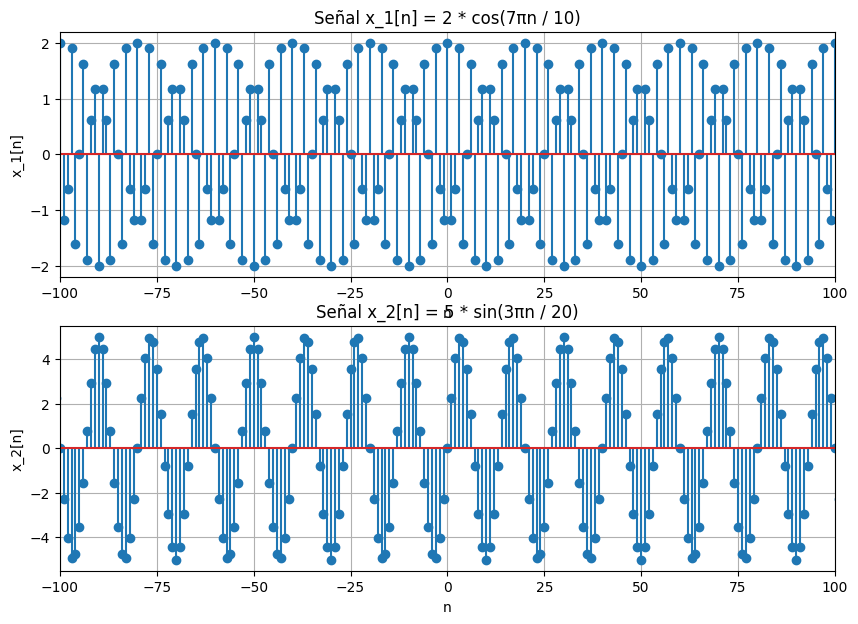

In [93]:
#Primero generamos las señales solicitadas y las gráficamos
n = np.arange(-200,200)
indices= n
x_1 = 2*np.cos((7*np.pi/10) * (n) )
x_2 = 5* np.sin( ( 3*np.pi/20 ) * n)
plt.figure(figsize=(10, 7))
# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(n, x_1)
plt.title('Señal x_1[n] = 2 * cos(7πn / 10)')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('x_1[n]')
plt.grid(True)

# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(n, x_2)
plt.title('Señal x_2[n] = 5 * sin(3πn / 20)')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()

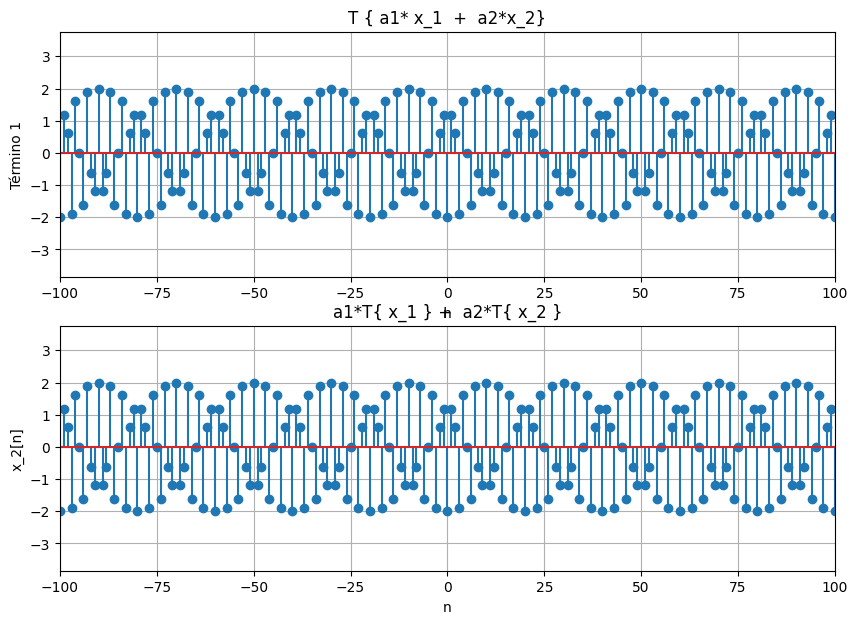

El error promedio en linealidad es : 2.7181962233894964e-15


In [94]:
#Definimos parámetros para probar la linealidad del sistema 
a2 = 1
a1 = 1
k = 20 #Delay
#Definimos acción del sistema
def sistema_T1(input , indices):
    #Retraso
    #Para representar el retraso agregamos valores de zeros a la derecha e izquierda para porder usar roll y desplazar sin problemas
    x_retraso = np.roll(np.pad(input,(10,10), mode="constant" ,constant_values=0) ,  10 ) 
    x_adelanto = np.roll(np.pad(input,(10,10), mode="constant" ,constant_values=0) ,  -10 )
    #Retornamos nuevos indices    
    return [(x_retraso + x_adelanto)/2 , np.arange(np.min(indices) - 10 ,  np.max(indices) + 11)]
#DEMOSTRAMOS LINEALIDAD 
#dado un T { a1* x_1  +  a2*x_2} = a1*T{x_1} +  a2*T{x_2}
[salida_1 , indices_1] =   sistema_T1(a1* x_1  +  a2*x_2 , indices) 
salida_2 = a1* sistema_T1(x_1, indices)[0] + a2* sistema_T1(x_2, indices)[0]
indices_2= sistema_T1(x_1, indices)[1]
plt.figure(figsize=(10, 7))
# Gráfico para x_1
plt.subplot(2, 1, 1)
plt.stem(indices_1, salida_1)
plt.title('T { a1* x_1  +  a2*x_2}')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('Término 1')
plt.grid(True)
# Gráfico para x_2
plt.subplot(2, 1, 2) 
plt.stem(indices_2, salida_2)
plt.title('a1*T{ x_1 } +  a2*T{ x_2 }')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('x_2[n]')
plt.grid(True)
plt.show()

print(f"El error promedio en linealidad es : {np.linalg.norm(salida_1-salida_2)}") 


Comentario : Después de realizar los cálculos podemos notar que los valores que los resultados de aplicar esas distintas operaciones , los resultados son bastante parecidos con un error extremadamente bajo .Por lo tanto podemos afirmar que el sistema es Lineal. Además por los ejercicos realizados en nuestro informe previo podemos determinar que es lineal análiticamente , y los resultados computacionalmente concuerdan con la teoría. 

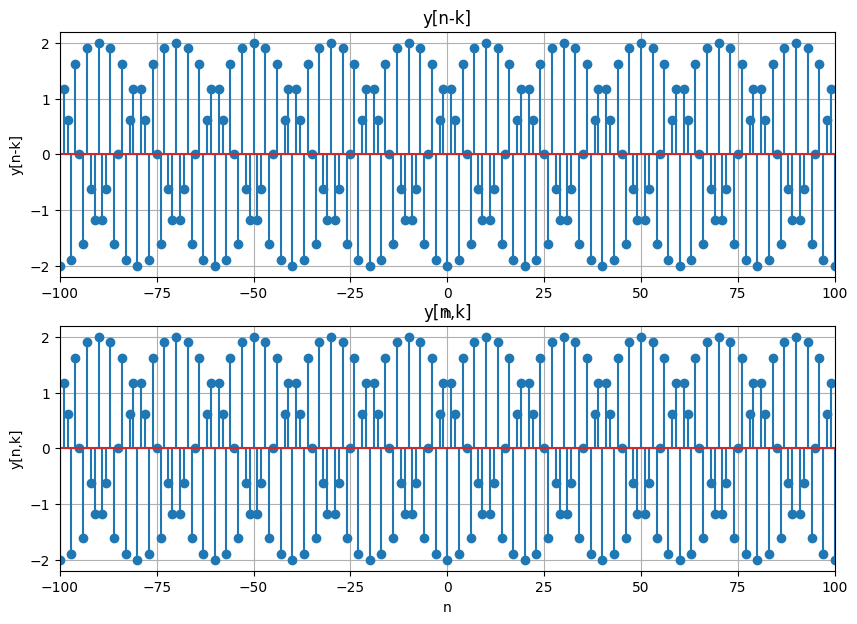

error promedio 0.0


In [95]:
#DEMOSTRAR INVARIANZA
def retraso_signal(signal , indices, delay):
    signal_delay = np.roll(np.pad(signal,(delay,delay), mode="constant" ,constant_values=0) , delay ) 
    idx= np.arange(np.min(indices) - delay ,  np.max(indices) + delay+1)
    return [signal_delay , idx]

#DEMOSTRAMOS LA INVARIANZA SOBRE LA SEÑAL DE ENTRADA X_1
term_1 = retraso_signal(sistema_T1(x_1,indices)[0],sistema_T1(x_1,indices)[1], k )[0]
term_1_idx = retraso_signal(sistema_T1(x_1,indices)[0],sistema_T1(x_1,indices)[1], k )[1]

indices_prueba_2_2 =  indices #Hacemos una copia 

term_2 = sistema_T1(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1] )[0]
term_2_idx = sistema_T1(retraso_signal(x_1, indices_prueba_2_2, k)[0],retraso_signal(x_1, indices_prueba_2_2, k)[1] )[1]

plt.figure(figsize=(10, 7))
# Gráfico para y[n-k]
plt.subplot(2, 1, 1)
plt.stem(term_1_idx, term_1)
plt.title('y[n-k]')
plt.xlim([-100,100])
plt.xlabel('n')
plt.ylabel('y[n-k]')
plt.grid(True)

# Gráfico para y[n,k]
plt.subplot(2, 1, 2) 
plt.stem(term_2_idx, term_2)
plt.title('y[n,k]')
plt.xlabel('n')
plt.xlim([-100,100])
plt.ylabel('y[n,k]')
plt.grid(True)
plt.show()

print(f"error promedio {np.linalg.norm(term_1-term_2)}")


La invarianza en el tiempo se define como la propiedad de obtener el mismo delay en la salida que al de la entrada . POr ello se implemento una función que realizará un delay a la señal respetando los indices que está tuviera. Se aplico este delay a una entrada y se le aplica el sistema ; luego se aplico directamente la entrada al sistema y a la salida se le aplico un delay. Después comparamos experimentalmente los resultado y obtuvimos un error de 0 , esto se debe a que , todas las operaciones que realizamos fueorn de desplazamiento y al haberlas hecho con mucho cuidado no se generaron errores.

Pregunta 2 (1pto.)
Imagine que se tiene los siguientes sistemas:
Sistema 1 (H[n]):
y1[n] = 10x[n] + 0.25x[n − 1] + 0.5y1[n − 1]
Donde y[n] son las se˜nales de salida del sistema.
a) Desarrollen un programa que permita calcular y graficar la respuesta
al impulso del sistema H[n]. Asumir que el sistema estaba inicialmente
en reposo. Para el gr´afico considerar N=50 muestras.

In [96]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

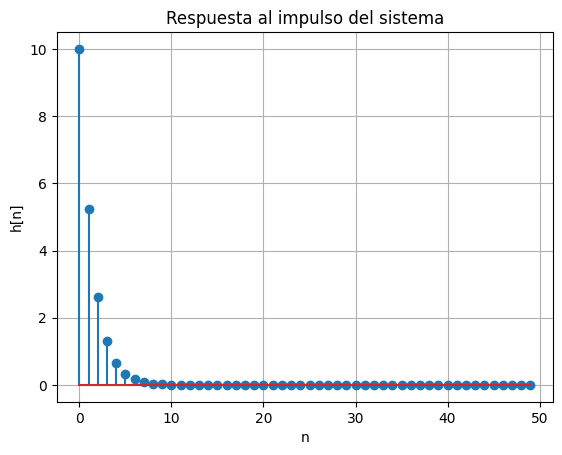

In [97]:
#Como se menciona que el sistema está inicialmente en reposo  
#y[-1] = 0
N= 50 #Número de samples
#Para simular la respuesta al impulso 
#Asumiremos un x_n = dirac(n)
x_n = np.zeros(N)
x_n[0]= 1
#Ahora metemos todo al bucle para barrer los valores de y_n
#y[0] = 10x[0] + 0.25*x[-1] + 0.5y[-1]
#
y_n = np.zeros(N)
for i  in range(N): 
    if (i==0) :
        y_n[i]= 10*x_n[i] 
    else:
        y_n[i]= 10*x_n[i] + 0.25*x_n[i-1] + 0.5*y_n[i-1]
# Graficar y_n
plt.stem( np.arange(len(y_n)) , y_n) #Antes de 0 , y_n =0
plt.title('Respuesta al impulso del sistema')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()

Se calcula la respuesta al impulso asumiendo un delta de kronocker a la entrada del sistema y realizando los calculos correspondientes a la acción del sistema. 